<a href="https://colab.research.google.com/github/snehalramteke27/Employee-Performance-Management-System/blob/main/Employee_Performance_Analysis_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Analysis Task ( Employee Performance Management System)**

The data is supervised and categorical.
The predictor variables are ordinal and a few among them are nominal. The target variable 'Performance Rating' is ordinal.

To analyze the data, various data processing techniques like Label Encoding and Standardization is used. Correlation Coeffecient is used to interpret the relationship between variables. The most important features selected are Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance.

For training the data and predicting the target, algorithms used are Logistic Regression, Support Vector Machine, Naive Bayes, and K-Nearest Neighbor.

A separate analysis of Department wise Performance is to be carried out. Data Analysis Summary.

The project is to be done with the purpose of finding out factors which affect the Performance of the employees, training a model which accurately predicts the Performance Rating of the employee, analyzing the data to provide recommendations to improve the performance and gain insights from the analysis. The following steps are needed to be carried out:

(a) Import the data provided, find out the predictor & target variables and look for missing values.

(b) Analysis of Department wise performance as asked.

(c) The Top 3 important features affecting the employee performance

(d) Label Encoding the ordinal columns.

(e) Calculate correlation coefficient to find out the relationship between variables and then select the important features for analysis.

(f) Standardizing the data and splitting it into test and train.

(g) Training the data using algorithms like Logistic Regression, Support Vector Machine, Naive Bayes, K-Nearest Neighbour and checking the accuracy to find out which algorithm is the best.

(h) Exporting the model with highest accuracy.

## **Importing Data**

In [1]:
# importing Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

 
import warnings
warnings.filterwarnings('ignore')

## **Load Data**

In [2]:
# Mount Drive to load data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the csv file
df = pd.read_excel('/content/drive/MyDrive/percept internship/Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [4]:
#Lets check top five rows
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
#Lets check last five rows
df.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [6]:
#shape of column with row and column
df.shape


(1200, 28)

In [7]:
#getting all the column
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [8]:
# Check the info of dataset to know the data types of columns or variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [9]:
#Describing the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EmpNumber,1200,1200,E1001000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1200.0,NaN,NaN,NaN,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
Gender,1200,2,Male,725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationBackground,1200,6,Life Sciences,492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaritalStatus,1200,3,Married,548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpDepartment,1200,6,Sales,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpJobRole,1200,19,Sales Executive,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravelFrequency,1200,3,Travel_Rarely,846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1200.0,NaN,NaN,NaN,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,NaN,NaN,NaN,2.8925,1.04412,1.0,2.0,3.0,4.0,5.0


In [10]:
#print the unique value
df.nunique()

EmpNumber                       1200
Age                               43
Gender                             2
EducationBackground                6
MaritalStatus                      3
EmpDepartment                      6
EmpJobRole                        19
BusinessTravelFrequency            3
DistanceFromHome                  29
EmpEducationLevel                  5
EmpEnvironmentSatisfaction         4
EmpHourlyRate                     71
EmpJobInvolvement                  4
EmpJobLevel                        5
EmpJobSatisfaction                 4
NumCompaniesWorked                10
OverTime                           2
EmpLastSalaryHikePercent          15
EmpRelationshipSatisfaction        4
TotalWorkExperienceInYears        40
TrainingTimesLastYear              7
EmpWorkLifeBalance                 4
ExperienceYearsAtThisCompany      37
ExperienceYearsInCurrentRole      19
YearsSinceLastPromotion           16
YearsWithCurrManager              18
Attrition                          2
P

In [11]:
#Looking for the description of the dataset to get insights of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1200.0,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,2.892500,1.044120,1.0,2.0,3.0,4.0,5.0
EmpEnvironmentSatisfaction,1200.0,2.715833,1.090599,1.0,2.0,3.0,4.0,4.0
EmpHourlyRate,1200.0,65.981667,20.211302,30.0,48.0,66.0,83.0,100.0
EmpJobInvolvement,1200.0,2.731667,0.707164,1.0,2.0,3.0,3.0,4.0
EmpJobLevel,1200.0,2.067500,1.107836,1.0,1.0,2.0,3.0,5.0
EmpJobSatisfaction,1200.0,2.732500,1.100888,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1200.0,2.665000,2.469384,0.0,1.0,2.0,4.0,9.0
EmpLastSalaryHikePercent,1200.0,15.222500,3.625918,11.0,12.0,14.0,18.0,25.0


# **Missing Value**

In [12]:
#Now lets check how many cells are missing from our dataset.
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [16]:
# Checking Duplicate Values
print(len(df[df.duplicated()]))

0


**Obeservations:** We don't have any missing and duplicate values is the dataset

# **Data Cleaning**

In [17]:
df.rename(columns={'EmpNumber':'EmpNumber', 'Age':'Age', 'Gender':'Gender', 'EducationBackground':'EducationBackground', 'MaritalStatus':'MaritalStatus',
       'EmpDepartment':'EmpDepartment', 'EmpJobRole':'EmpJobRole', 'BusinessTravelFrequency':'BusinessTravelFrequency',
       'DistanceFromHome':'DistanceFromHome', 'EmpEducationLevel':'EmpEducationLevel', 'EmpEnvironmentSatisfaction':'EmpEnvironmentSatisfaction',
       'EmpHourlyRate':'EmpHourlyRate', 'EmpJobInvolvement':'EmpJobInvolvement', 'EmpJobLevel':'EmpJobLevel',
       'EmpJobSatisfaction':'EmpJobSatisfaction', 'NumCompaniesWorked':'NumCompaniesWorked', 'OverTime':'OverTime',
       'EmpLastSalaryHikePercent':'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction':'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears':'TotalWorkExperienceInYears', 'TrainingTimesLastYear':'TrainingTimesLastYear',
       'EmpWorkLifeBalance':'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany':'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole':'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion':'YearsSinceLastPromotion',
       'YearsWithCurrManager':'YearsWithCurrManager', 'Attrition':'Attrition', 'PerformanceRating':'PerformanceRating'},inplace=True)

In [ ]:
df.columns

# **Exploratory Data Analysis (EDA)**

## **a) Department Wise Performance**

There are six types of department available -

* Sales
* Human Resource
* Development
* Research and Development
* Finance
* Data Science

In [18]:
# A new pandas Dataframe is created to analyze department wise performance as asked.
dept = df.iloc[:,[5,27]].copy()
dept_per = dept.copy()

In [19]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

<Axes: xlabel='EmpDepartment', ylabel='PerformanceRating'>

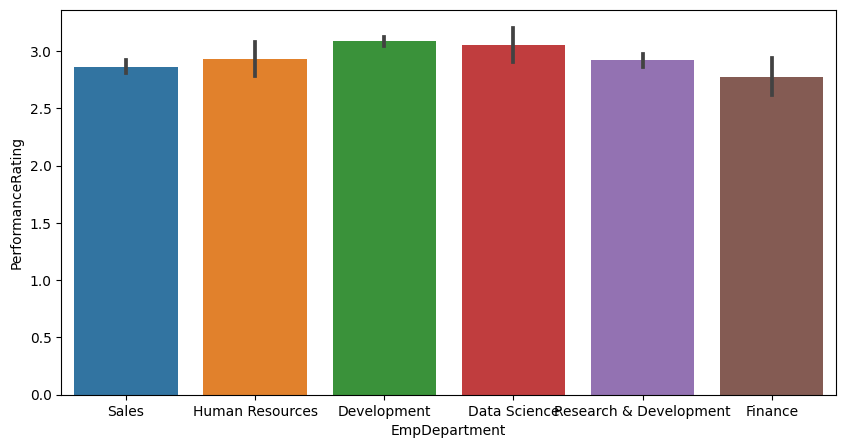

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x='EmpDepartment',y='PerformanceRating', data=df)

In [21]:
# Analyze each department separately
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

In [22]:
# Creating a new dataframe to analyze each department separately
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

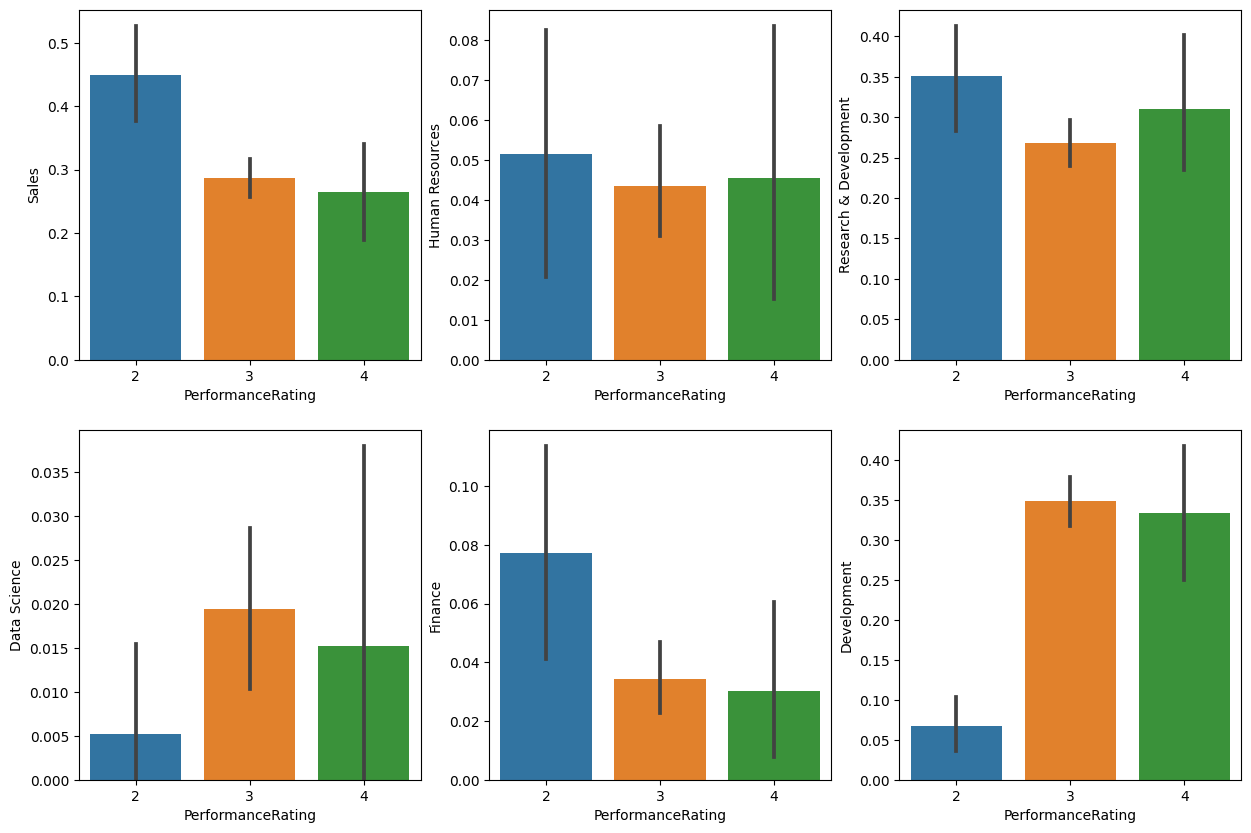

In [23]:
#Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(x='PerformanceRating',y='Sales',data=dept_rating)

plt.subplot(2,3,2)
sns.barplot(x='PerformanceRating',y='Human Resources',data=dept_rating)

plt.subplot(2,3,3)
sns.barplot(x='PerformanceRating',y='Research & Development',data=dept_rating)

plt.subplot(2,3,4)
sns.barplot(x='PerformanceRating',y='Data Science',data=dept_rating)

plt.subplot(2,3,5)
sns.barplot(x='PerformanceRating',y='Finance',data=dept_rating)

plt.subplot(2,3,6)
sns.barplot(x='PerformanceRating',y='Development',data=dept_rating)

plt.show()

**Observation:**

From the above graph we can conclude that from the EmpDepartment Development department is showing High performance rating

**Sales:** The Performace rating level 3 is more in the sales department. The male performance rating the little bit higher compared to female.

**Human Resources:** The majority of the employees lying under the level 3 performance . The older people are performing low in this department. The female employees in HR department doing really well in their performance.

**Development:** The maximum number of employees are level 3 performers. Employees of all age are performing at the level of 3 only. The gender-based performance is nearly same for both.

**Data Science:** The highest average of level 3 performance is in data science department. Data science is the only department where less number of level 2 performers. The overall performance is higher compared to all departments. Male employees are doing good in this department.

**Research & Development:** The age factor is not deviating from the level of performance here where different employees with different age are there in every level of performance. The R&D has the good female employees in their performance.

Finance: The finance department performance is exponentially decreasing when age increases. The male employees are doing good. The experience factor is inversely relating to the performance level.

# **b) The Top 3 important features affecting the employee performance**

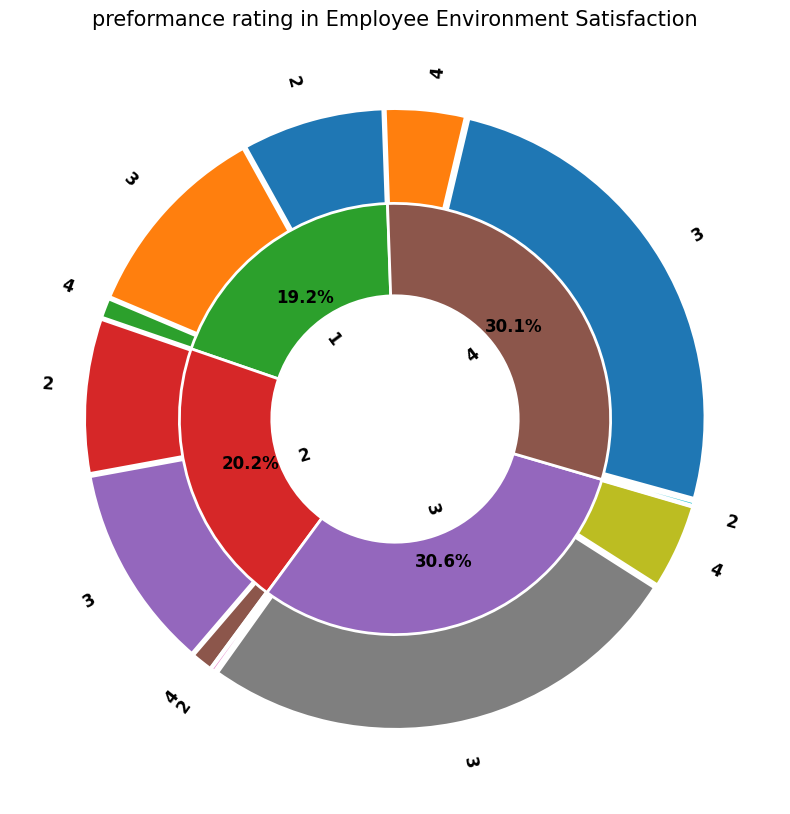

In [24]:
# 1.Employee enviorment Satisfaction
plt.figure(figsize=(10,10))
plt.title("preformance rating in Employee Environment Satisfaction",fontsize=15)
plt.pie([90,127,13,98,130,14,3,310,54,3,307,51], radius=1,
        
        explode =[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01],
        labels=[2,3,4,2,3,4,2,3,4,2,3,4],rotatelabels=True,
        pctdistance=0.80, 
        textprops = {"fontsize":12,"fontweight":"bold"},
        startangle=92,
        wedgeprops=dict(width=0.6, edgecolor='w',linewidth=3))
  

plt.pie([230,242,367,361], radius=0.7,
       
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=2),textprops = {"fontsize":12,"fontweight":"bold"},
        autopct='%.1f%%',
        labels=[1,2,3,4],
        pctdistance=0.70, labeldistance=0.4, rotatelabels=True,startangle=92)
plt.show()

Maximum Number of Employees Performance Rating belongs to EmpEnvironmentSatisfaction Level 3 & Level 4, It contains 367 & 361.

In [25]:

# 2.Employee last salary hike percent
pd.crosstab(df['EmpLastSalaryHikePercent'],df['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpLastSalaryHikePercent,,,,
11,28,140,1,169
12,30,123,2,155
13,27,138,3,168
14,28,140,4,172
15,11,67,4,82
16,12,54,2,68
17,9,55,3,67
18,10,63,0,73
19,10,51,2,63


More Number of Employees whose salary hike percentage belongs to 11-19 % are getting 2 & 3 performance rating Maximum time. as well asEmployees whose salary hike percentage is in between 20-22%, There performance rating is 4.

In [26]:
# 3.Employee Work life balance
pd.crosstab(df['EmpWorkLifeBalance'],df['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpWorkLifeBalance,,,,
1,16,48,0,64
2,51,216,27,294
3,115,533,79,727
4,12,77,26,115
All,194,874,132,1200


In EmpWorkLifeBalance, level 3 is showing high Performance Rating of employees

# **Label Encoding**

In [27]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
enc = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    df.iloc[:,i] = enc.fit_transform(df.iloc[:,i])
df.head()


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


# **Feature Selection**

In [28]:
# Finding out the correlation coeffecient to find out which predictors are significant.
df.corr()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,-0.040107,-0.055905,-0.098368,-0.000104,-0.037665,0.040579,0.020937,0.207313,0.013814,...,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164
Gender,-0.040107,1.000000,0.009922,-0.042169,-0.010925,0.011332,-0.043608,-0.001507,-0.022960,0.000033,...,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,0.035758,-0.001780
EducationBackground,-0.055905,0.009922,1.000000,-0.001097,-0.026874,-0.012325,0.012382,-0.013919,-0.047978,0.045028,...,0.005652,-0.027929,0.051596,0.022890,-0.009887,-0.003215,0.014277,0.002767,0.027161,0.005607
MaritalStatus,-0.098368,-0.042169,-0.001097,1.000000,0.067272,0.038023,0.028520,-0.019148,0.026737,-0.032467,...,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.162969,0.024172
EmpDepartment,-0.000104,-0.010925,-0.026874,0.067272,1.000000,0.568973,-0.045233,0.007707,0.019175,-0.019237,...,-0.050286,0.016065,0.016438,0.068875,0.047677,0.069602,0.052315,0.033850,0.048006,-0.162615
EmpJobRole,-0.037665,0.011332,-0.012325,0.038023,0.568973,1.000000,-0.086251,0.022939,-0.016792,0.044612,...,-0.043067,-0.049529,0.004452,-0.007519,-0.009047,0.019383,0.012190,-0.004504,0.037508,-0.096209
BusinessTravelFrequency,0.040579,-0.043608,0.012382,0.028520,-0.045233,-0.086251,1.000000,-0.020935,0.002064,0.012267,...,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,0.007217,-0.031025
DistanceFromHome,0.020937,-0.001507,-0.013919,-0.019148,0.007707,0.022939,-0.020935,1.000000,0.045856,-0.017719,...,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142
EmpEducationLevel,0.207313,-0.022960,-0.047978,0.026737,0.019175,-0.016792,0.002064,0.045856,1.000000,-0.037103,...,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529
EmpEnvironmentSatisfaction,0.013814,0.000033,0.045028,-0.032467,-0.019237,0.044612,0.012267,-0.017719,-0.037103,1.000000,...,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,-0.123490,0.395561


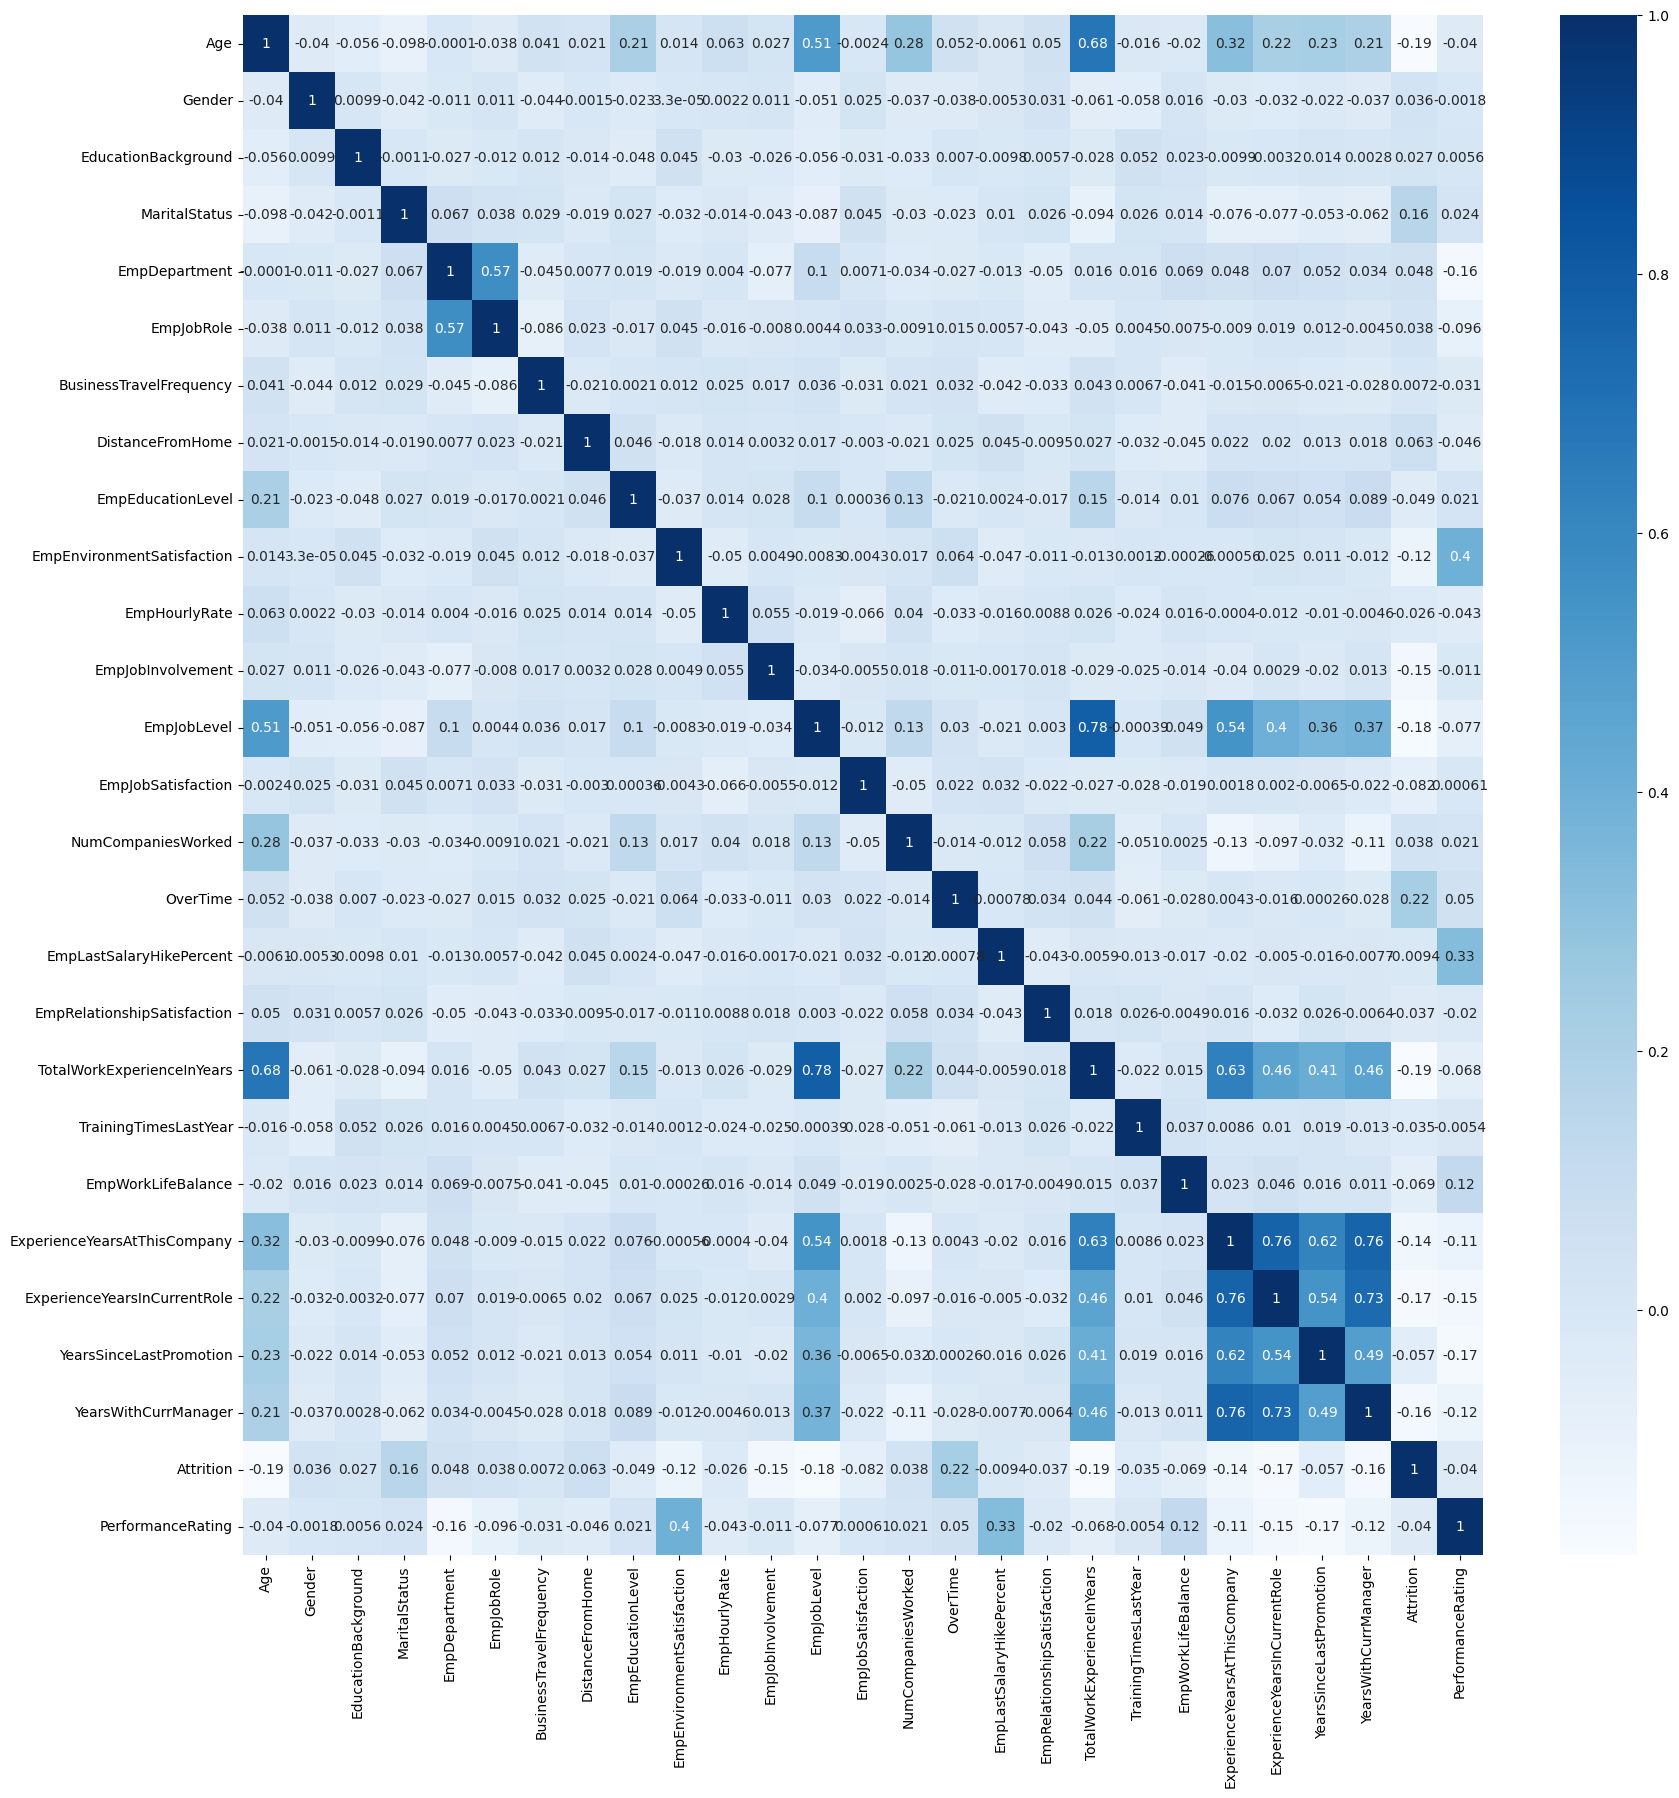

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

From above heatmap scale we are clearly seen the their is no highly correlated feature in data

# **Model Training**

## **Train Test split for regression**

In [30]:
# Dropping the first columns as it is of no use for analysis.
df.drop(['EmpNumber'],inplace=True,axis=1)

In [31]:
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


In [32]:
# Here we have selected only the important columns
y = df.PerformanceRating
#X = df.iloc[:,0:-1]  All predictors were selected it resulted in dropping of accuracy.
X = df.iloc[:,[4,5,9,16,20,21,22,23,24]] # Taking only variables with correlation coeffecient greater than 0.1

In [33]:
X.head()

,EmpDepartment,EmpJobRole,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,5,13,4,12,2,10,7,0,8
1,5,13,4,12,3,7,7,1,7
2,5,13,4,21,3,18,13,1,12
3,3,8,2,15,2,21,6,12,6
4,5,13,1,14,3,2,2,2,2


In [34]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

In [35]:
#Create test and train data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [36]:
# Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
X_train.shape

(840, 9)

In [38]:
X_test.shape

(360, 9)

In [39]:
df.describe().columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

# **Model Implementation**

**In the section below, we used algorithms like Logistic Regression, Support Vector Machine, Naive Bayes and K-Nearest Neighbor**

# **1. Logistics Regression**

In [40]:
# Training the model

model_logr = LogisticRegression()
model_logr.fit(X_train,y_train)

LogisticRegression()

In [41]:
# Predicting the model
y_predict_log = model_logr.predict(X_test)

In [42]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_log))

0.8333333333333334


In [43]:
print(classification_report(y_test,y_predict_log))

              precision    recall  f1-score   support

           2       0.65      0.48      0.55        63
           3       0.86      0.94      0.90       264
           4       0.81      0.67      0.73        33

    accuracy                           0.83       360
   macro avg       0.78      0.69      0.73       360
weighted avg       0.82      0.83      0.82       360



In [44]:
confusion_matrix(y_test,y_predict_log)

array([[ 30,  30,   3],
       [ 14, 248,   2],
       [  2,   9,  22]])

# **2. K-Nearest Neighbor**

In [45]:
# Training the model

model_knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [46]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [47]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))

0.8333333333333334


In [48]:
print(classification_report(y_test,y_predict_knn))

              precision    recall  f1-score   support

           2       0.74      0.59      0.65        63
           3       0.85      0.94      0.90       264
           4       0.78      0.42      0.55        33

    accuracy                           0.83       360
   macro avg       0.79      0.65      0.70       360
weighted avg       0.83      0.83      0.82       360



In [49]:
confusion_matrix(y_test,y_predict_knn)

array([[ 37,  25,   1],
       [ 12, 249,   3],
       [  1,  18,  14]])

# **3. Support Vector Machine**

In [50]:
# Training the model

rbf_svc = SVC(kernel='rbf', C=100, random_state=10).fit(X_train,y_train)

In [51]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [52]:
#Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))


0.8444444444444444


In [53]:
print(classification_report(y_test,y_predict_svm))

              precision    recall  f1-score   support

           2       0.74      0.78      0.76        63
           3       0.92      0.88      0.90       264
           4       0.54      0.67      0.59        33

    accuracy                           0.84       360
   macro avg       0.73      0.78      0.75       360
weighted avg       0.85      0.84      0.85       360



In [54]:
confusion_matrix(y_test,y_predict_svm)

array([[ 49,  13,   1],
       [ 13, 233,  18],
       [  4,   7,  22]])

# **4. Naive Bayes Bernoulli**

In [55]:
# Training the model

model_nb = BernoulliNB()
model_nb.fit(X_train,y_train)

BernoulliNB()

In [56]:
# Predicting the model
y_predict_nb = model_nb.predict(X_test)

In [57]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_nb))

0.7944444444444444


In [58]:
print(classification_report(y_test,y_predict_nb))

              precision    recall  f1-score   support

           2       0.75      0.48      0.58        63
           3       0.80      0.97      0.88       264
           4       0.00      0.00      0.00        33

    accuracy                           0.79       360
   macro avg       0.52      0.48      0.49       360
weighted avg       0.72      0.79      0.74       360



In [59]:
confusion_matrix(y_test,y_predict_nb)

array([[ 30,  33,   0],
       [  8, 256,   0],
       [  2,  31,   0]])

The trained model is created using the machine learning algorithm as follows with the accuracy score

i) Logistics Regression: 83.33% accuracy

ii) K-nearest Neighbour: 83.33% accuracy

iii) Support vector Machine : 84.40% accuracy

 iv) Naive Bayes Bernoulli : 79.44% accuracy

# **Results:**

1) We don't have any missing and duplicate values is the dataset.

### **2) Goal 1 :-**

From the above graph we can conclude that from the EmpDepartment Development department is showing High performance rating

**Sales:** The Performace rating level 3 is more in the sales department. The male performance rating the little bit higher compared to female.

**Human Resources:** The majority of the employees lying under the level 3 performance . The older people are performing low in this department. The female employees in HR department doing really well in their performance.

**Development:** The maximum number of employees are level 3 performers. Employees of all age are performing at the level of 3 only. The gender-based performance is nearly same for both.

**Data Science:** The highest average of level 3 performance is in data science department. Data science is the only department where less number of level 2 performers. The overall performance is higher compared to all departments. Male employees are doing good in this department.

**Research & Development:** The age factor is not deviating from the level of performance here where different employees with different age are there in every level of performance. The R&D has the good female employees in their performance.

**Finance:** The finance department performance is exponentially decreasing when age increases. The male employees are doing good. The experience factor is inversely relating to the performance level.

### **3) Goal 2:-**

*i)Employee Enviroment satisfaction:*

Maximum Number of Employees Performance Rating belongs to EmpEnvironmentSatisfaction Level 3 & Level 4, It contains 367 & 361.

*2)Employee last salary hike percent:*

More Number of Employees whose salary hike percentage belongs to 11-19 % are getting 2 & 3 performance rating Maximum time.
Employees whose salary hike percentage is in between 20-22%, There performance rating is 4

*3)Employee work life balance:*

In EmpWorkLifeBalance, level 3 is showing high Performance Rating of employees.

### **4) Goal 4:-**

The trained model is created using the machine learning algorithm as follows with the accuracy score

i) Logistics Regression: 83.33% accuracy

ii) K-nearest Neighbour: 83.33% accuracy

iii) Support vector Machine : 84.40% accuracy

iv) Naive Bayes Bernoulli : 79.44% accuracy

**The Maximum accuracy score is support vector machine is 84.40%**